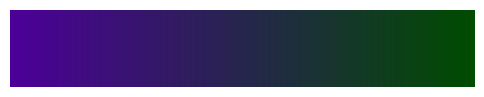

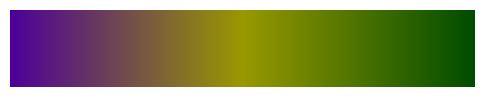

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_custom_colormap(colors):
      # 주황색(1, 0.5, 0)에서 초록색(0, 1, 0)으로의 그레디언트
    
    n_bins = 1500  # 색상 간격의 수

    cmap_name = "orange_to_green"
    colormap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    return colormap


colors1 = [(0.3, 0, 0.6), (0, 0.3, 0)]
colors2  = [(0.3, 0, 0.6), (0.6,0.6,0), (0, 0.3, 0)]

# 컬러바 생성
custom_cmap1 = create_custom_colormap(colors1)
custom_cmap2= create_custom_colormap(colors2)

# 컬러바 플로팅
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 1))
ax.set_axis_off()
ax.imshow(gradient, aspect='auto', cmap=custom_cmap1)
plt.show()

fig, ax = plt.subplots(figsize=(6, 1))
ax.set_axis_off()
ax.imshow(gradient, aspect='auto', cmap=custom_cmap2)
plt.show()

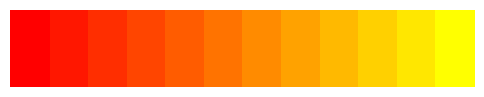

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_custom_colormap():
    #colors = [(1, 0.2, 0),(0.7,1,0)]#,(0, 0.6,0) ]
    colors = [(1, 0, 0), (1, 1, 0)]#, (0.85, 1, 0)]  # 주황색(1, 0.5, 0)에서 진한 녹색(0, 0.8, 0)으로의 그레디언트
    #colors  = [(1, 0.4, 0),  (0.2, 0.6, 0), (0.8, 0.8, 0.8)]
    n_bins = 12  # 색상 간격의 수

    cmap_name = "orange_to_dark_green"
    colormap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    return colormap

# 컬러바 생성
custom_cmap = create_custom_colormap()

# 컬러바 플로팅
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 1))
ax.set_axis_off()
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)
plt.show()


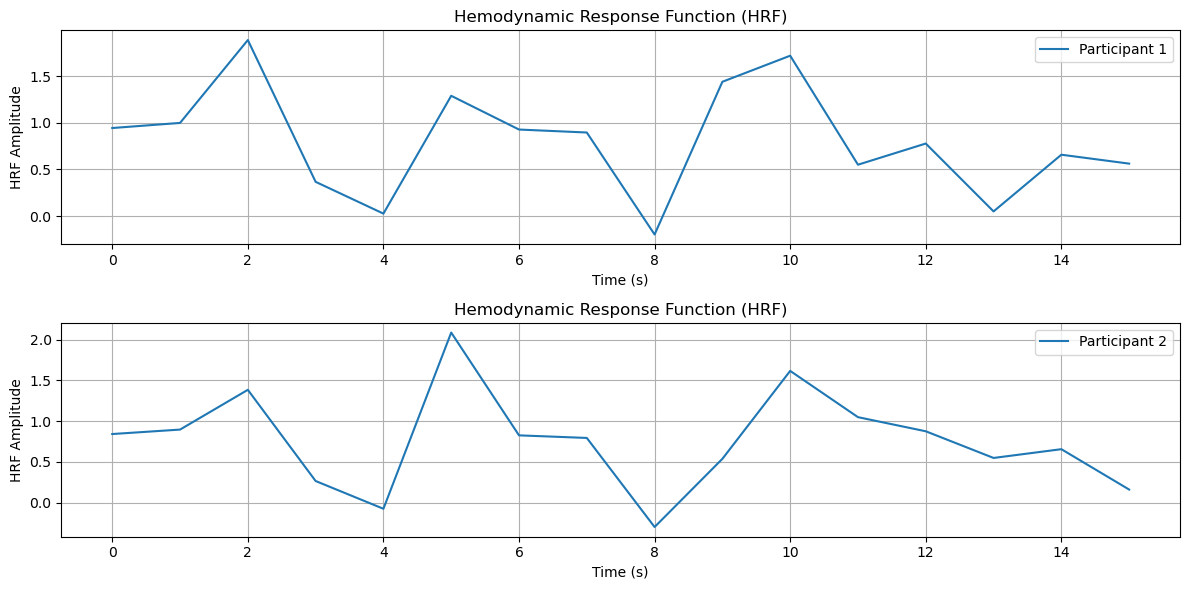

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, unit_impulse

# HRF 함수 정의
def create_hrf():
    # 각 참가자에 대한 HRF 구성요소 정의
    common_response = np.array([1, 0.5, 0.2, 0.1, 0.05, 1, 0.5, 0.2, 0.1, 0.05, 1, 0.5, 0.2, 0.1, 0.05, 0.1,])  # 공통 신경 반응
    individual_response_participant1 = np.array([0.2, 0.4, 1, 0.4, 0.2, 0.2, 0.4, 0.6, 0.4, 1, 0.3, 0.5, 0.3, 0.1, 0.4, 0.6,])  # 참가자1의 개인 차이
    individual_response_participant2 = np.array([0.1, 0.3, 0.5, 0.3, 0.1, 1, 0.3, 0.5, 0.3, 0.1, 0.2,1, 0.4, 0.6, 0.4, 0.2])  # 참가자2의 개인 차이
    noise_response = np.random.normal(0, 0.3, len(common_response))  # 랜덤 노이즈

    # 각 구성요소를 더한 최종 HRF
    hrf_participant1 = common_response + individual_response_participant1 + noise_response
    hrf_participant2 = common_response + individual_response_participant2 + noise_response

    return hrf_participant1, hrf_participant2

# HRF 함수 시각화
def plot_hrf(hrf, participant_name):
    time_points = np.arange(0, len(hrf))

    plt.plot(time_points, hrf, label=f'Participant {participant_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('HRF Amplitude')
    plt.title('Hemodynamic Response Function (HRF)')
    plt.legend()
    plt.grid(True)

# 두 참가자의 HRF 구성요소 시각화
hrf_participant1, hrf_participant2 = create_hrf()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_hrf(hrf_participant1, '1')

plt.subplot(2, 1, 2)
plot_hrf(hrf_participant2, '2')

plt.tight_layout()
plt.show()


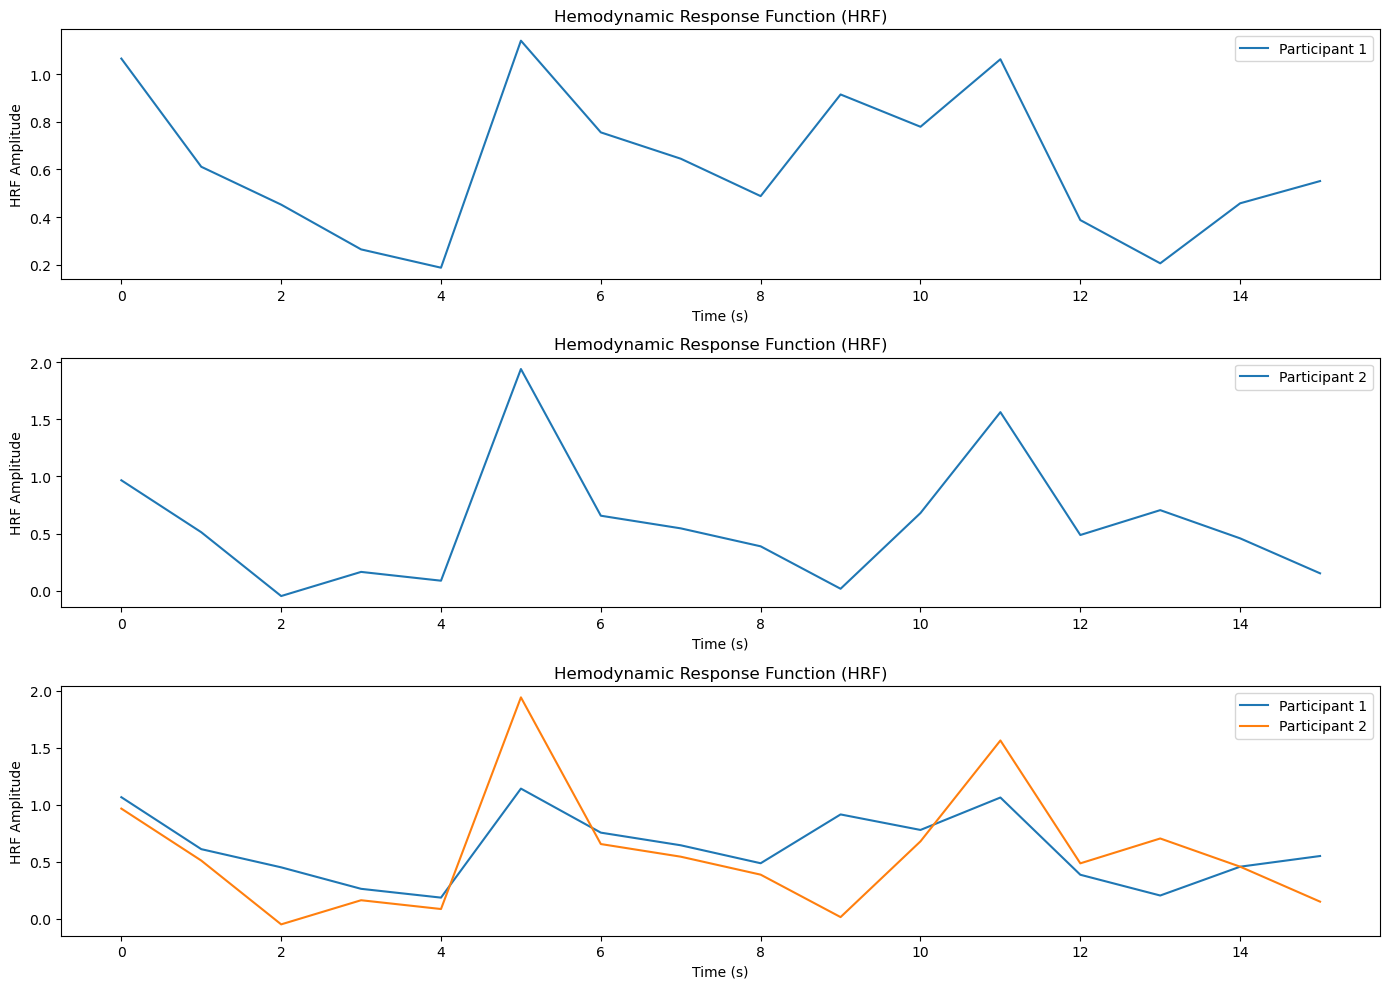

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, unit_impulse

def create_hrf():
    # 각 참가자에 대한 HRF 구성요소 정의
    common_response = np.array([1, 0.5, 0.2, 0.1, 0.05, 1, 0.5, 0.2, 0.1, 0.05, 1, 0.5, 0.2, 0.1, 0.05, 0.1,])  # 공통 신경 반응
    individual_response_participant1 = np.array([0.2, 0.4, 1, 0.4, 0.2, 0.2, 0.4, 0.6, 0.4, 1, 0.3, 0.5, 0.3, 0.1, 0.4, 0.6,])  # 참가자1의 개인 차이
    individual_response_participant2 = np.array([0.1, 0.3, 0.5, 0.3, 0.1, 1, 0.3, 0.5, 0.3, 0.1, 0.2,1, 0.4, 0.6, 0.4, 0.2])  # 참가자2의 개인 차이
    noise_response = np.random.normal(0, 0.3, len(common_response))

    # 각 구성요소를 더한 최종 HRF
    hrf_participant1 = common_response + individual_response_participant1 + noise_response
    hrf_participant2 = common_response + individual_response_participant2 + noise_response

    return hrf_participant1, hrf_participant2

def plot_hrf(hrf, participant_name):
    time_points = np.arange(0, len(hrf))

    plt.plot(time_points, hrf, label=f'Participant {participant_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('HRF Amplitude')
    plt.title('Hemodynamic Response Function (HRF)')
    plt.legend()
    plt.grid(False)  # 그리드 없애기

# 두 참가자의 HRF 구성요소 및 전체 HRF 시각화
hrf_participant1, hrf_participant2 = create_hrf()

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.title('Common Neural Response')
plot_hrf(hrf_participant1, '1')
plt.subplot(3, 1, 2)
plt.title('Individual Differences in Neural Response')
plot_hrf(hrf_participant2, '2')
plt.subplot(3, 1, 3)
plt.title('Random Noise in Neural Response')
plot_hrf(hrf_participant1, '1')
plot_hrf(hrf_participant2, '2')

plt.tight_layout()
plt.show()
